# Pendahuluan
Datasets yang digunakan pada penugasan kali ini merupakan data yang berisi catatan kriminal di London. Data ini memiliki rentang waktu dari 2008 hingga 2016. Dengan rincian isi dari data tersebut sebagai berikut :

1. lsoa_code: kode area kepolisian 
2. borough: nama bagian wilayah sekitar london 
3. major_category: Kejahatan tingkat tinggi
4. minor_category: Kejahatan ringan 
5. value: jumlah total kejahatan tiap bulan pada wilayah tersebut 
6. year: rentang tahun kejadian kejahatan dari 2008 - 2016
7. month: bulan kejadian kejahatan dengan nilai 1 - 12

# Import Library

In [1]:
import requests 
import pandas as pd 
import numpy as np 
import folium 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Load data

In [2]:
# Ganti 'nama-file.csv' dengan nama file dataset yang Anda unduh
df = pd.read_csv('london_crime_by_lsoa.csv')
df.head(5)


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
df.drop('lsoa_code', axis=1, inplace=True)
df.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
print("----Informasi Baris dan Kolom----")
print("Baris : ", df.shape[0])
print("Kolom : ", df.shape[1])

----Informasi Baris dan Kolom----
Baris :  13490604
Kolom :  6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   borough         object
 1   major_category  object
 2   minor_category  object
 3   value           int64 
 4   year            int64 
 5   month           int64 
dtypes: int64(3), object(3)
memory usage: 617.6+ MB


In [6]:
# Menampilkan jumlah entri untuk setiap tahun dalam kolom 'year' dengan urutan terurut
df['year'].value_counts().sort_index()

year
2008    1498956
2009    1498956
2010    1498956
2011    1498956
2012    1498956
2013    1498956
2014    1498956
2015    1498956
2016    1498956
Name: count, dtype: int64

# Exploratory & Cleaning Data

In [7]:
df.duplicated().sum()

13005859

In [8]:
df = df.drop_duplicates(inplace= False)
print("Jumlah duplikasi data : " + str(df.duplicated().sum()))

Jumlah duplikasi data : 0


In [9]:
df.isnull().sum().sum()

0

# Visualisasi

## Area Plot

In [10]:
df_sorted = df.sort_values(by=['year','month', 'borough'])

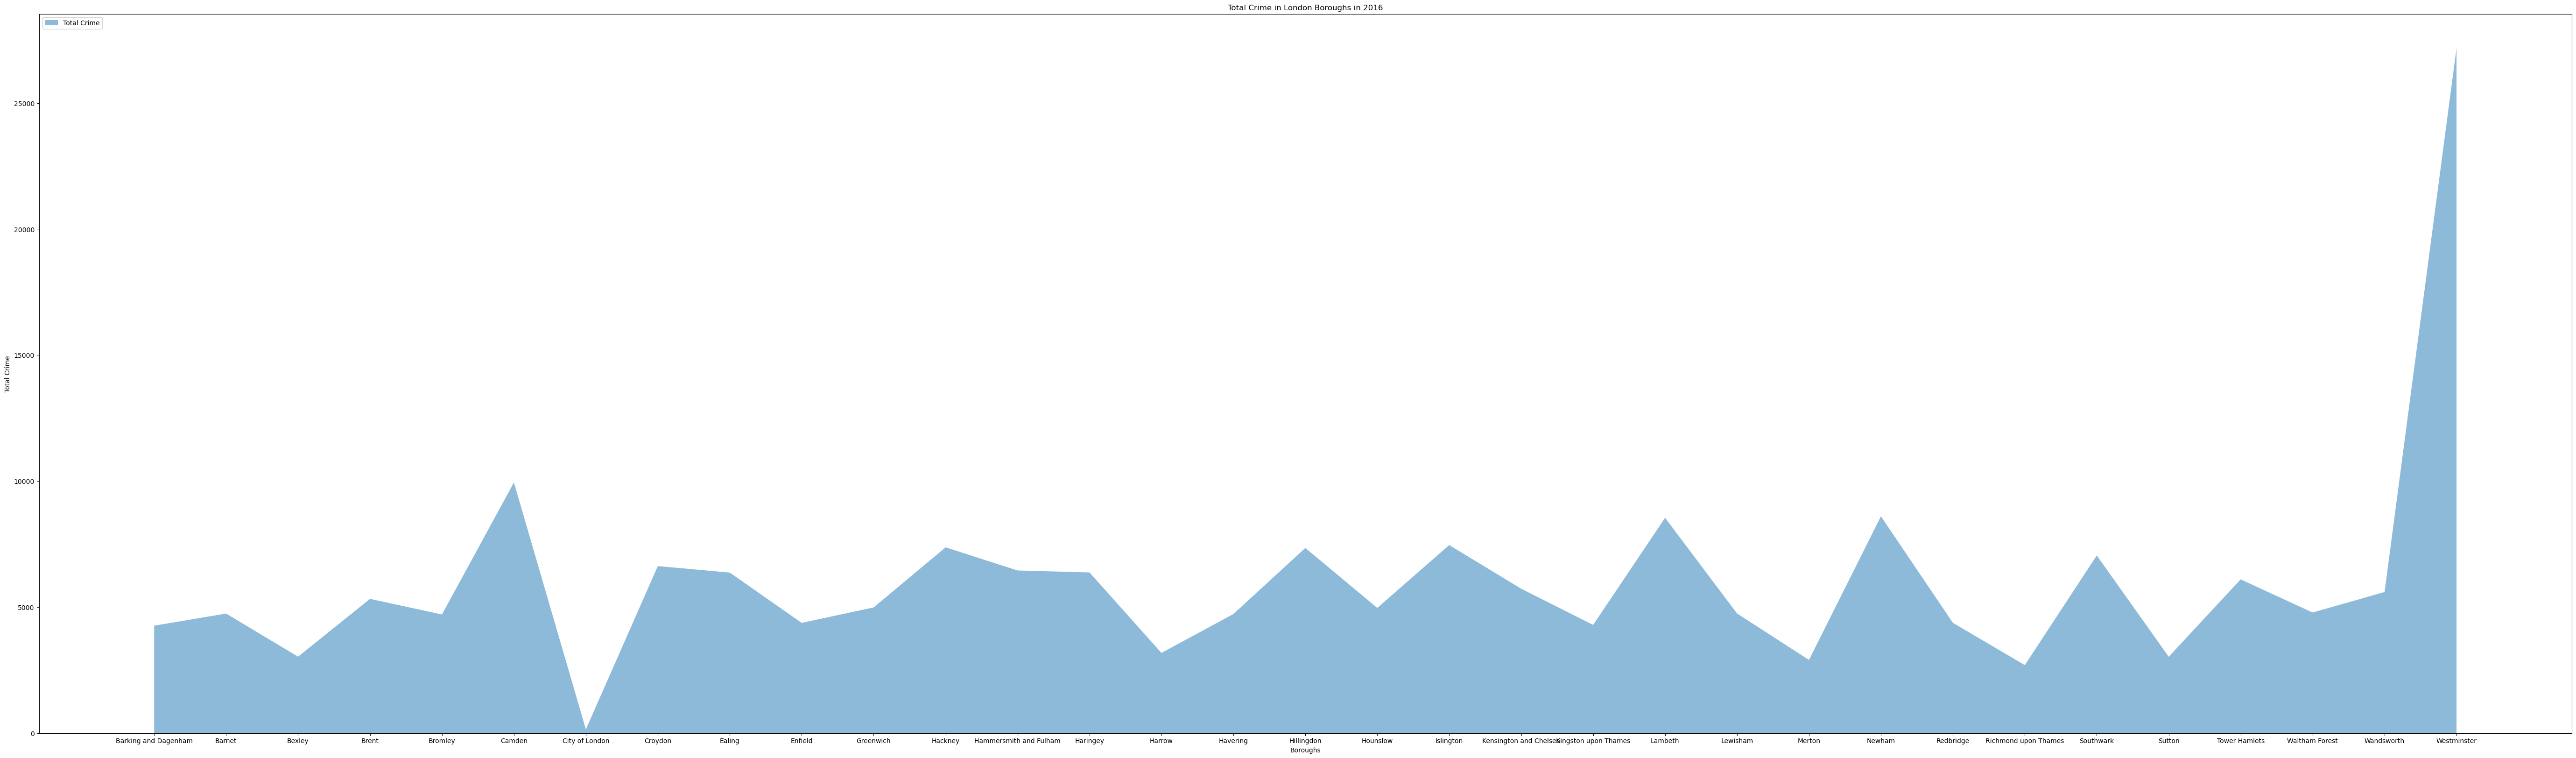

In [11]:
crime2016 = df[df['year'] == 2016]
borough_data = crime2016.groupby('borough')['value'].sum().reset_index()

# plot the data using area plot
plt.figure(figsize=(70,20))
plt.stackplot(borough_data['borough'], borough_data['value'], labels=['Total Crime'], alpha=0.5)
plt.title('Total Crime in London Boroughs in 2016')
plt.xlabel('Boroughs')
plt.ylabel('Total Crime')
plt.legend(loc='upper left')

plt.show()

## Bar Chart

Text(0, 0.5, 'Number of Crime')

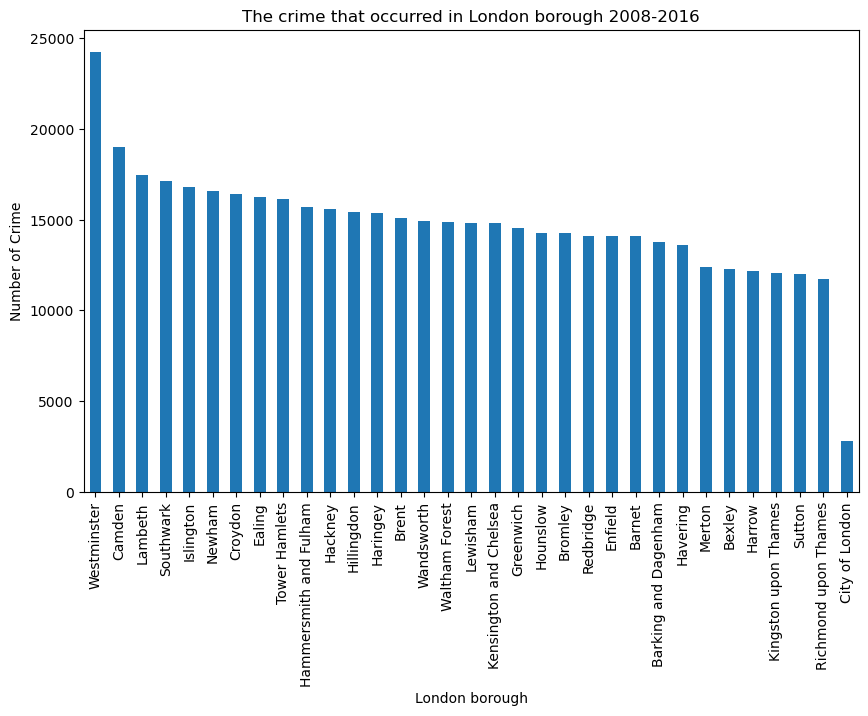

In [12]:
bar_chart= df.borough.value_counts().plot(kind='bar', figsize=(10,6))
plt.title('The crime that occurred in London borough 2008-2016')
plt.xlabel('London borough')
plt.ylabel('Number of Crime')

## Pie Chart

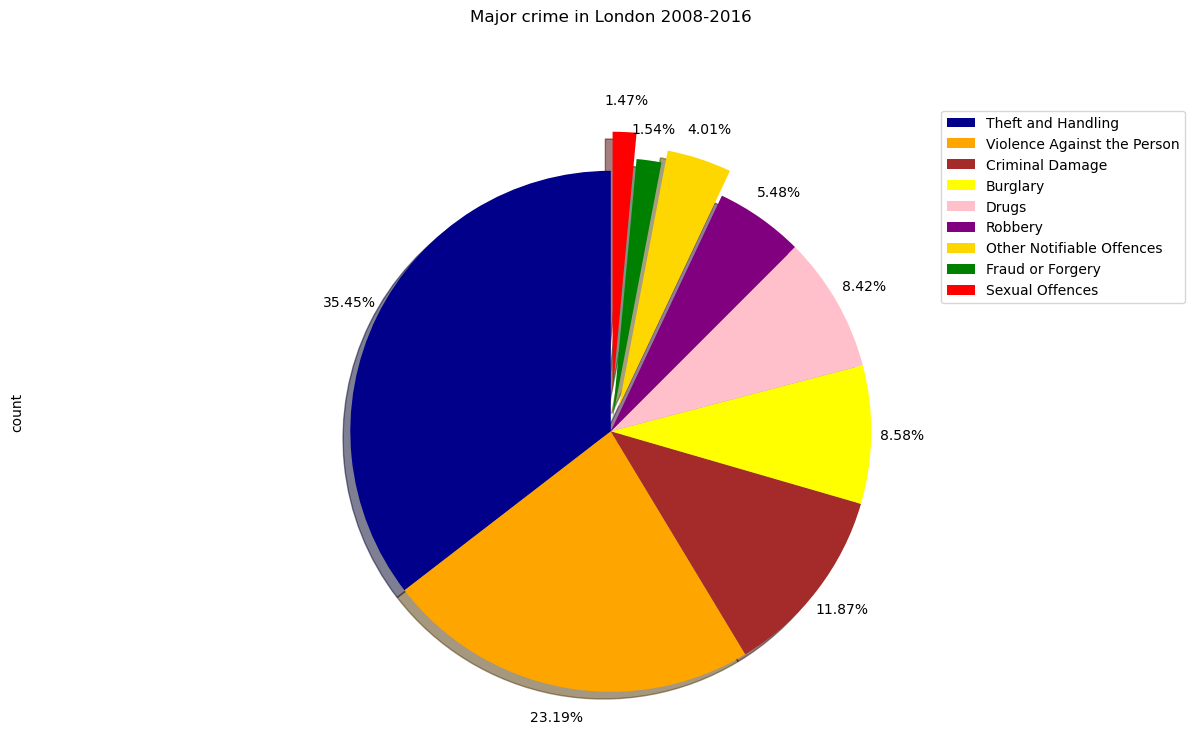

In [13]:
pie_chart = df['major_category'].value_counts()
colors_list = ['darkblue','orange','brown','yellow','pink','purple','gold','green','red']
explode_list = [0, 0, 0, 0, 0, 0, 0.1, 0.05, 0.15]

# Plot pie chart
pie_chart.plot(kind='pie', figsize=(15,8), autopct="%1.2f%%", startangle=90, shadow=True, 
          labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list)

plt.title('Major crime in London 2008-2016', y=1.12)
plt.axis('equal')
plt.legend(pie_chart.index)  # Menggunakan index dari data sebagai label pada legenda
plt.show()


## Box Plot

In [14]:
df_box =df[['borough', 'major_category']].groupby('borough')['major_category'].value_counts()

Text(0.5, 1.0, 'Crime in Westminster 2008-2016')

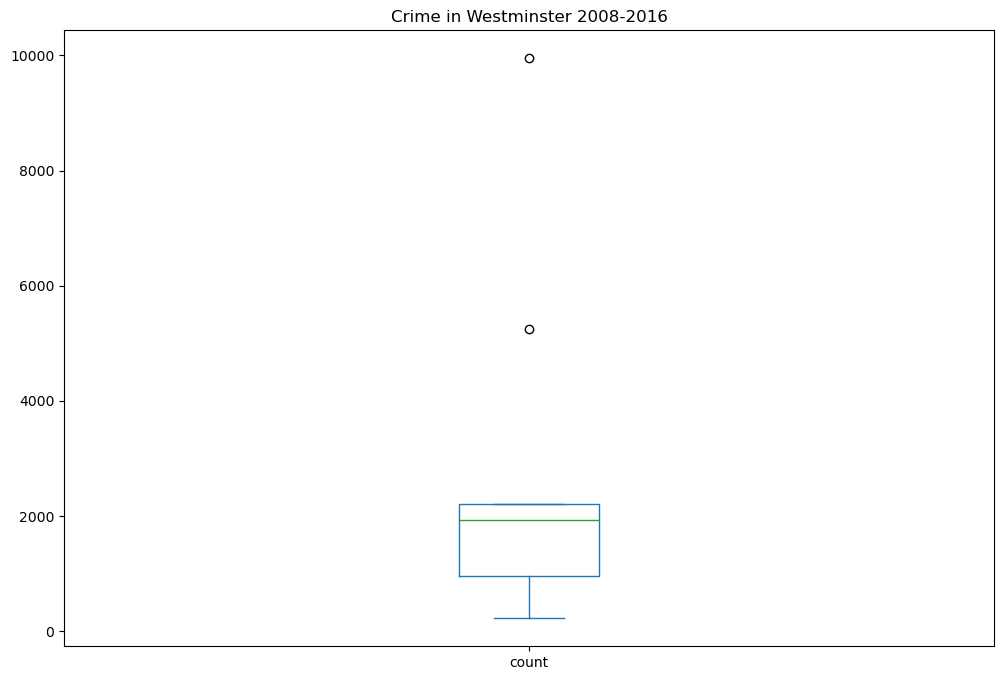

In [15]:
box_plot = df_box.loc['Westminster']
box_plot.plot(kind='box', figsize=(12,8))
plt.title('Crime in Westminster 2008-2016')

## Scatter Plot

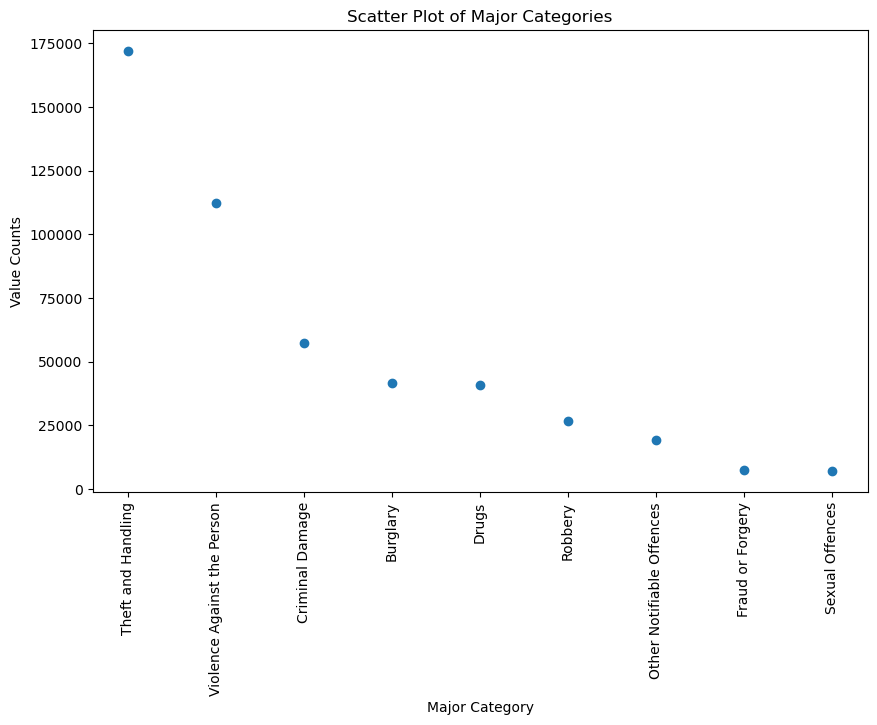

In [16]:
scatter_plot = df['major_category'].value_counts()

# Mengatur sumbu x dan y untuk scatter plot
x_values = scatter_plot.index
y_values = scatter_plot.values

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values)
plt.title('Scatter Plot of Major Categories')
plt.xlabel('Major Category')
plt.ylabel('Value Counts')
plt.xticks(rotation=90)  # Mengatur rotasi label sumbu x agar lebih mudah dibaca
plt.show()


## Word Clouds

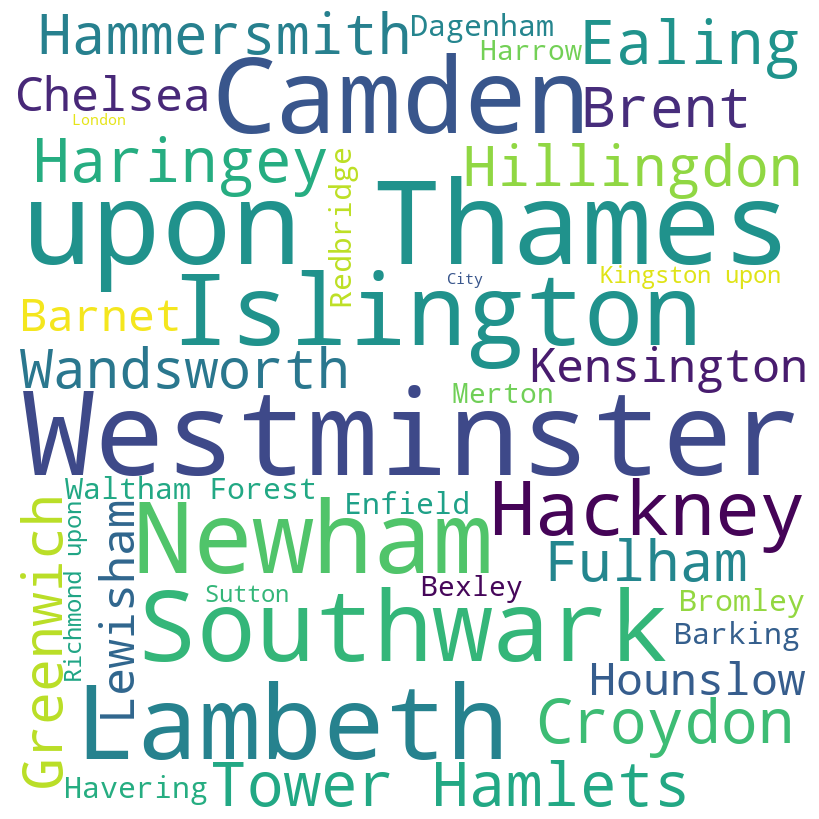

In [17]:
df_word = df[df['year'] == 2016]['borough']


text = " ".join(df_word)


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text)


plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [18]:
latitude = 51.509415564065826 
longitude = -0.12284589542672435

In [19]:
london_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [20]:
london_map

In [21]:
df2 = df[['borough','value']]
london_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
m = folium.Map(location=[51.509415564065826 , -0.12284589542672435], zoom_start=11)
folium.Choropleth(
    geo_data=london_geo,
    data=df2,
    columns=["borough", "value"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name="Crime rate in boroughs of London",
    highlight=True,
).add_to(m)

m